# Using Libraries in R

In [4]:
#MASS package, which is a very large collection of data sets and functions.
library(MASS)

#Few required packages, run from R-console
#install.packages("ISLR", "/Applications/anaconda3/lib/R/library")
#install.packages("carData", "/Applications/anaconda3/lib/R/library")
#install.packages("car", "/Applications/anaconda3/lib/R/library")


In [5]:
#Change working directory
setwd('/Users/manishkain/Documents/ML Learning/ISLR')
getwd()

[1] "/Users/manishkain/Documents/ML Learning/ISLR"

In [6]:
#Problem:
#Issue occured while executing install.packages("ISLR")
#Error message "Failed to set default locale"
#Solution: 
#Execute command in R-console and restart console: 
#system("defaults write org.R-project.R force.LANG en_US.UTF-8")
#This command resolve default locale issue

#ISLR package do not comes with R, hence installation require before first time use
library(ISLR)

# Simple Linear Regression
- Problem statement: Predict Median house value around Boston neighborhoods using given Data set
- About Data set: The Boston data frame has 506 rows and 14 columns.
    - crim: per capita crime rate by town.
    - zn: proportion of residential land zoned for lots over 25,000 sq.ft.
    - indus :proportion of non-retail business acres per town.
    - chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    - nox: nitrogen oxides concentration (parts per 10 million).
    - rm: average number of rooms per house.
    - age: average age of houses, proportion of owner-occupied units built prior to 1940.
    - dis: weighted mean of distances to five Boston employment centres.
    - rad: index of accessibility to radial highways.
    - tax: full-value property-tax rate per USD 10,000.
    - ptratio: pupil-teacher ratio by town.
    - black: 1000(𝐵𝑘−0.63)2 where 𝐵𝑘 is the proportion of blacks by town.
    - lstat: percent of households with low socioeconomic status, lower status of the population (percent).
    - medv: median house value of owner-occupied homes in USD 1000s.

In [7]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

<b>Using the lm() function to fit a simple linear regression model, with medv as the response and lstat as the predictor. 

In [8]:
lm.fit = lm(medv~lstat ,data=Boston)
#attach(Boston)
#lm.fit = lm(medv~lstat)

In [9]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [10]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [11]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [12]:
lm.fit$coefficients

(Intercept)       lstat 
 34.5538409  -0.9500494

In [13]:
#coef function returns same coefficients
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [14]:
#To obtain a confidence interval for the coefficient estimates
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [15]:
#The predict() function can be used to produce confidence intervals 
#and prediction intervals for the prediction of medv for a given value of lstat.

#Produce confidence interval of prediction
print("Confidence interval of prediction")
predict(lm.fit, data.frame(lstat = c(5,10,15)), interval = "confidence")

#Produce probability interval of prediction
print("Prediction interval of prediction")
predict(lm.fit, data.frame(lstat = c(5,10,15)), interval = "prediction")

[1] "Confidence interval of prediction"


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


[1] "Prediction interval of prediction"


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


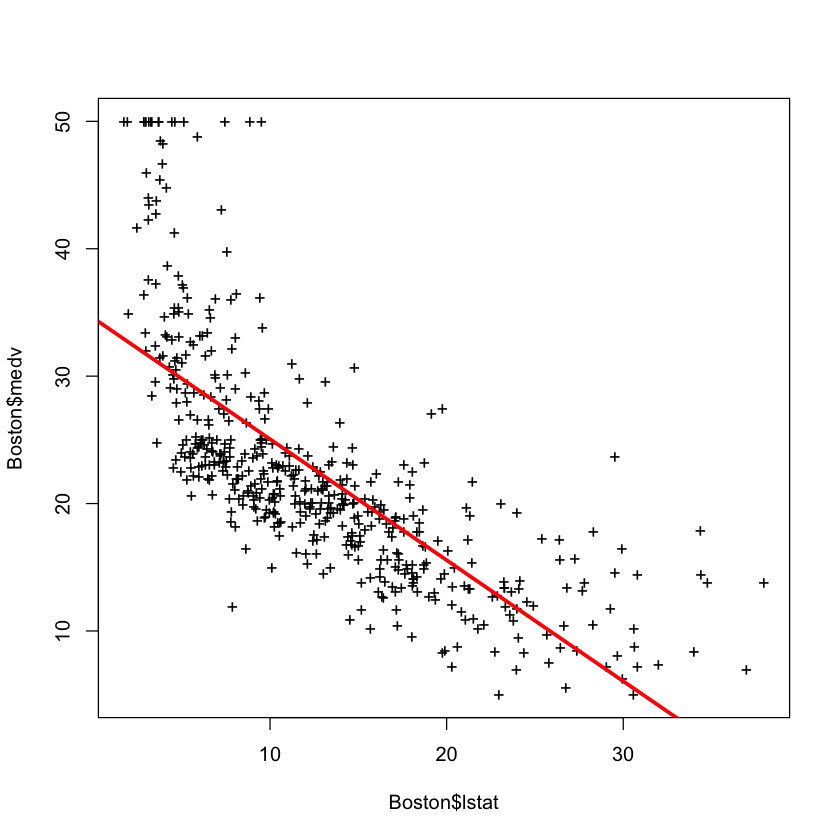

In [16]:
plot(Boston$lstat, Boston$medv, pch='+')
#Use the pch option to create different plotting symbols.

abline(lm.fit, col="red", lwd=3)
#The lwd=3 command causes the width of the regression line to be increased by a factor of 3; 
#this works for the plot() and lines() functions also.
#To draw a line with intercept a and slope b, we type abline(a,b).

<b>There is some evidence for non-linearity in the relationship between lstat and medv. 

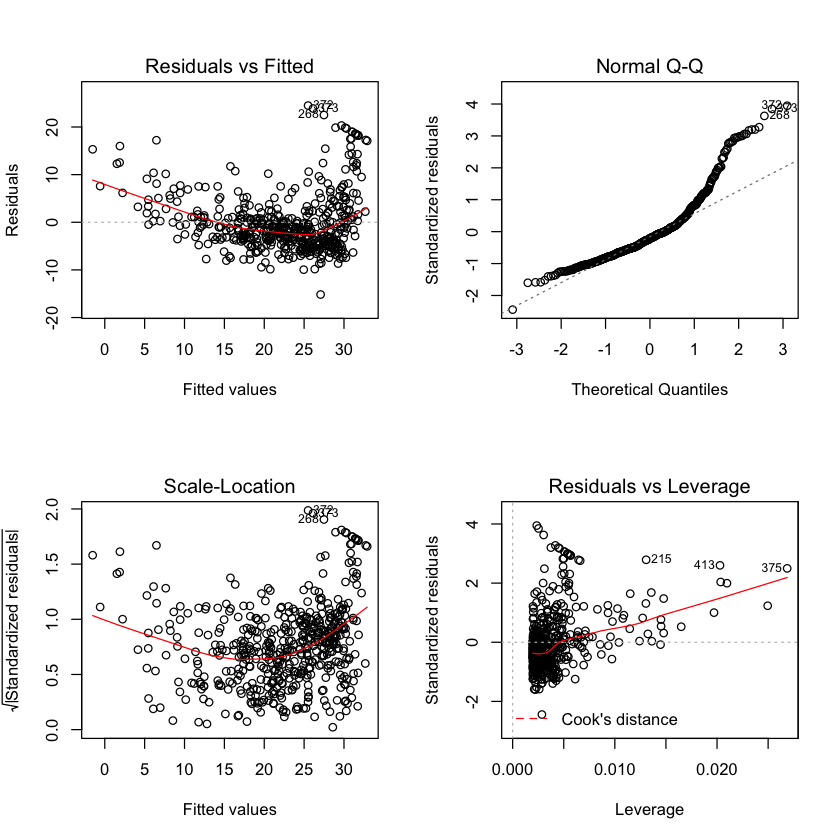

In [17]:
#Using the par() function, which tells R to split the display screen into separate panels
par(mfrow=c(2,2)) 

#Examine some diagnostic plots, it will produce 4 plots
plot(lm.fit)

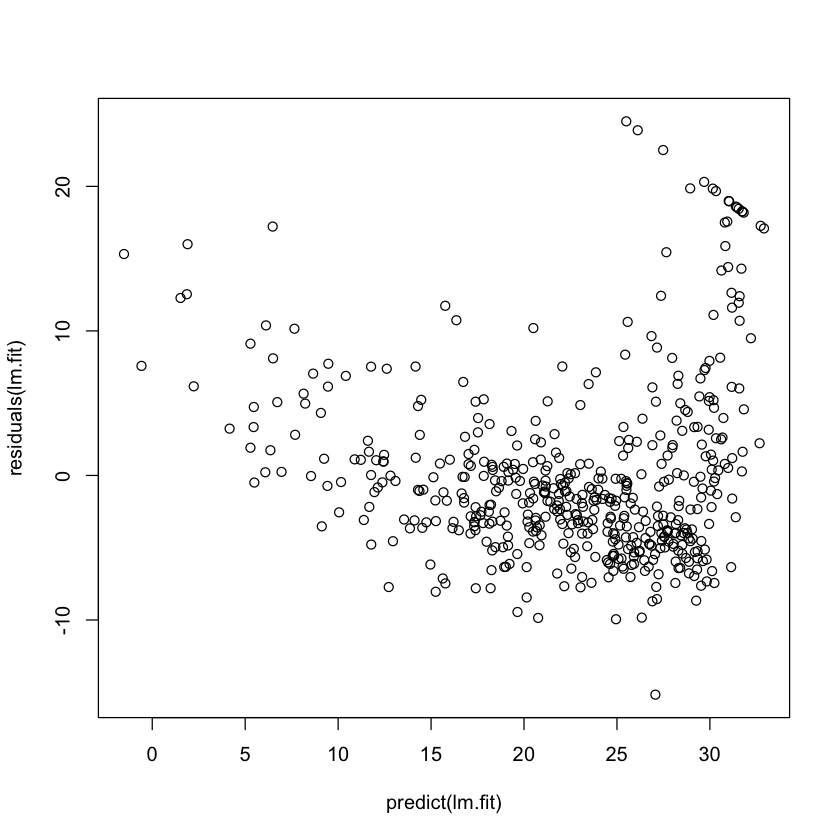

In [18]:
#Alternatively, compute the residuals from a linear regression fit using the residuals() function. 
plot(predict(lm.fit), residuals(lm.fit))

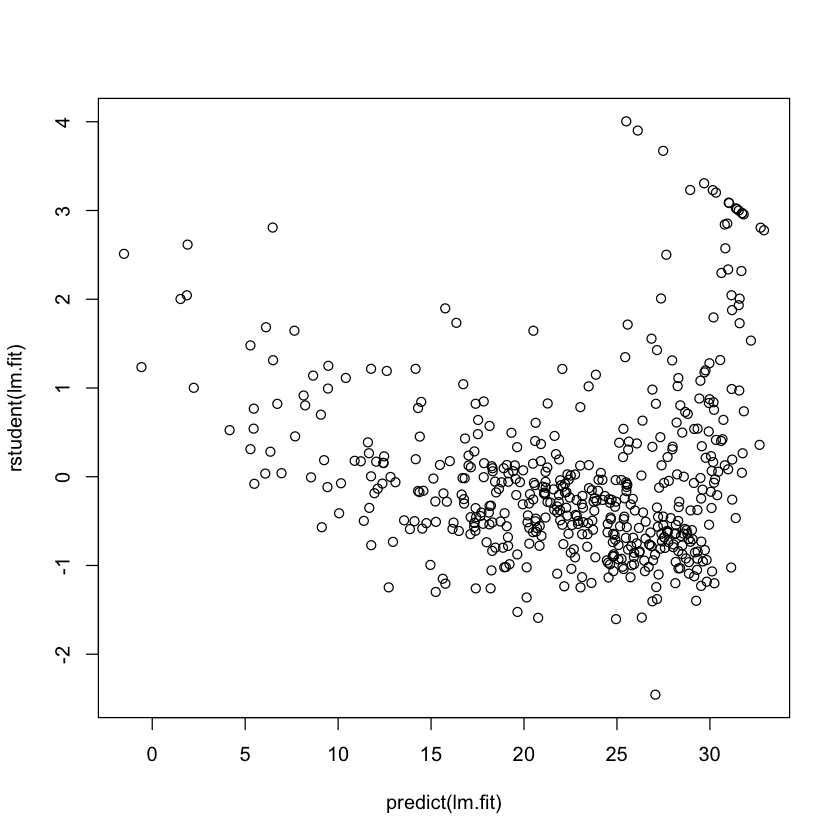

In [19]:
#The function rstudent() will return the studentized residuals, 
#and we can use this function to plot the residuals against the fitted values.
plot(predict(lm.fit), rstudent(lm.fit))

<b>On the basis of the residual plots, there is some evidence of non-linearity.

375 
375

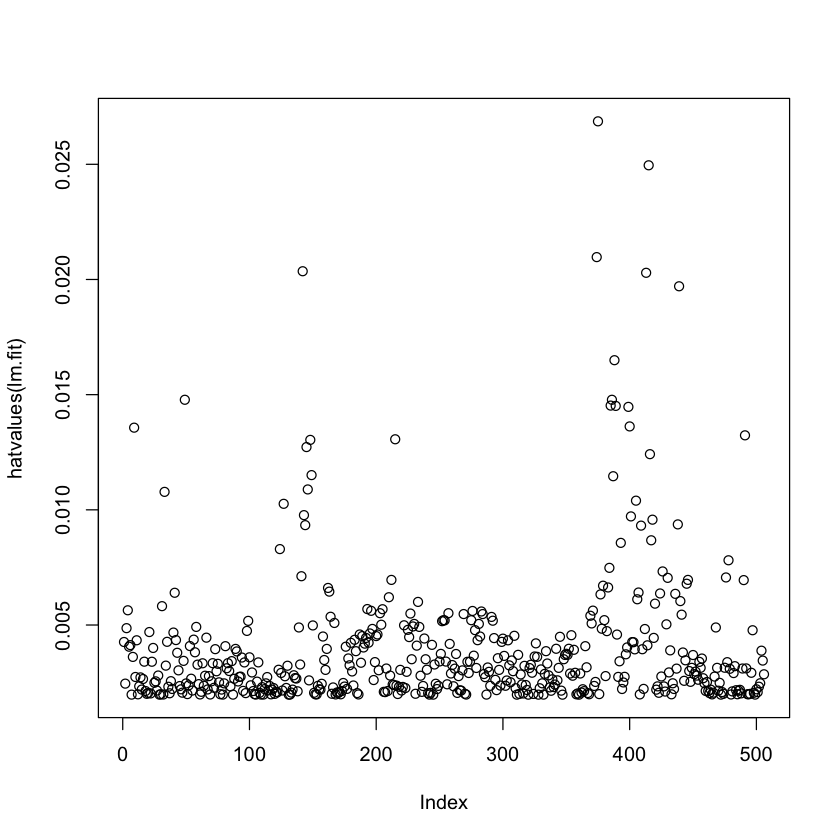

In [20]:
#Leverage statistics can be computed for any number of predictors using the hatvalues() function
plot(hatvalues(lm.fit))

#The which.max() function identifies the index of the largest element of a vector. 
#In this case, it tells us which observation has the largest leverage statistic.
which.max(hatvalues(lm.fit))

# Multiple Linear Regression

In [21]:
#Fitting two predictors lstat and age using same function
lm.fit = lm(medv~lstat+age, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [22]:
#short-hand for including all 13 predictors in dataset
lm.fit = lm(medv~.,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [23]:
#We can access the individual components of a summary object by name
summary(lm.fit)$r.sq #gives us the R2
summary(lm.fit)$sigma #gives us the RSE

#type ?summary.lm to see what is available

[1] 0.7406427

[1] 4.745298

In [24]:
#The car package is not part of the base R installation, so it must be downloaded the first time
#you use it via the install.packages("car") option in R.
library(carData)
library(car)

In [25]:
#The vif() function, part of the "car" package, can be used to compute variance inflation factors. 
#Most VIF’s are low to moderate for this data. 
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

- <b>A better way to assess multi-collinearity is to compute the variance inflation factor (VIF). 
- <b>As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.


In [26]:
#To perform a regression using all the variables but one
lm.fit1 = lm(medv~.-age, data=Boston)
summary(lm.fit1)
#Alternatively, the update() function can be used.
#lm.fit1=update(lm.fit, ~.-age)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

# Interaction Terms

In [27]:
#lstat:age tells R to use interaction between variables
#lstat*age shorthand for lstat+age+lstat:age
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


# Non-linear Transformations of the Predictors

In [28]:
summary( lm(medv~lstat+I(lstat^2), data=Boston) )


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [29]:
#Use the anova() function to further quantify the extent 
#to which the quadratic fit is superior to the linear fit
lm.fit2 = lm(medv~lstat+I(lstat^2), data=Boston) 
lm.fit = lm(medv~lstat, data=Boston)
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


- The anova() function performs a hypothesis test comparing the two models
- The null hypothesis is that the two models fit the data equally well
- The alternative hypothesis is that the full model is superior. 
- The F-statistic is 135 and the associated p-value is virtually zero. 
- This provides clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only contains the predictor lstat.

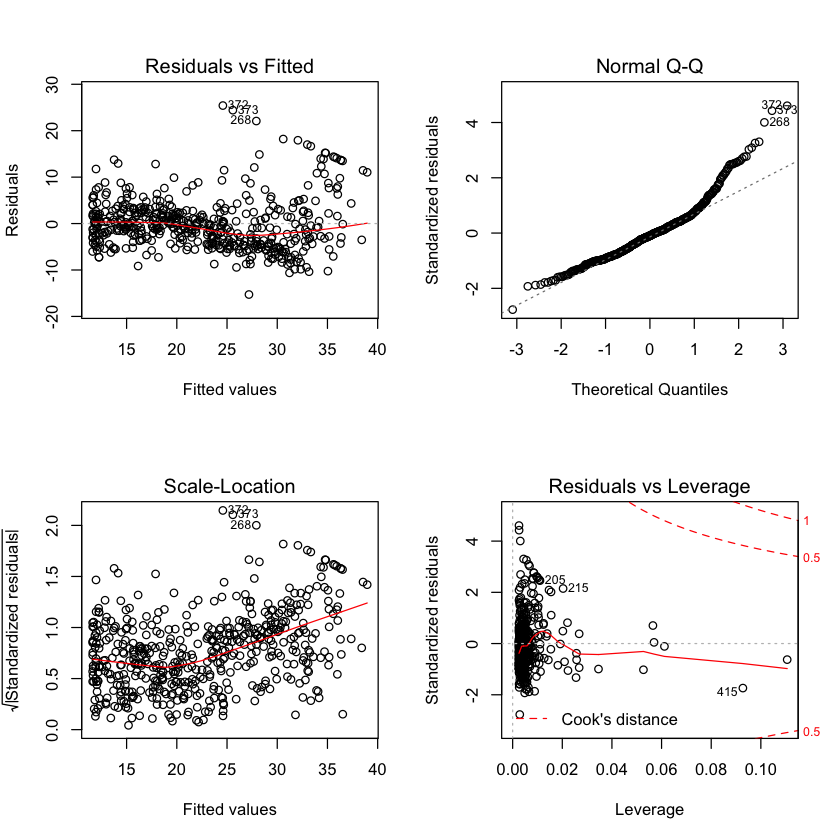

In [30]:
par(mfrow=c(2,2))
plot(lm.fit2)

In [31]:
#Command produces a fifth-order polynomial fit
lm.fit5=lm(medv~poly(lstat ,5), data=Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


In [32]:
#try a log transformation.
summary(lm(medv~log(rm), data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


# Qualitative Predictors
- We will now examine the Carseats data, which is part of the ISLR library. 
- We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [33]:
names( Carseats )

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

<b>The Carseats data includes qualitative predictors such as </b>
- Shelveloc, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location.

In [34]:
summary(Carseats$ShelveLoc)

Bad   Good Medium 
    96     85    219

In [35]:
#Given a qualitative variable such as Shelveloc, R generates dummy variables automatically. 
#Below we fit a multiple regression model that includes some interaction terms.
lm.fit=lm(Sales~.+Income:Advertising+Price:Age, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [36]:
# This function returns the coding that R uses for the dummy variables.
contrasts (Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


# Writing Functions

In [37]:
loadLibraries=function(){
    library(MASS)
    library(ISLR)
    print("Libraries loaded successfuly")
}

In [38]:
#Displays definition of function
loadLibraries

function(){
    library(MASS)
    library(ISLR)
    print("Libraries loaded successfuly")
}

In [39]:
#Invoke the function
loadLibraries()

[1] "Libraries loaded successfuly"
